In [3]:
import numpy as np
import matplotlib.pyplot as plt

**4.1** Cree una señal que sea la suma de tres componentes sinusoidales con frecuencias de 40, 80 y 160 Hz. Defina la freciencia de muestreo mínima necesaria para respresentar la señal y utilice la frecuencia de muestro necesaria para representarla apropiadamente.

La frecuencia de muestreo debe ser de al menos el doble de la frecuencia máxima, que en este caso es 160 Hz. Por lo tanto la frecuencia de muestreo necesaria para representar adecuadamente la señal debe ser 320 Hz o más. En este caso, se tomará 3200 Hz.

Text(0.5, 0, 'Segundos')

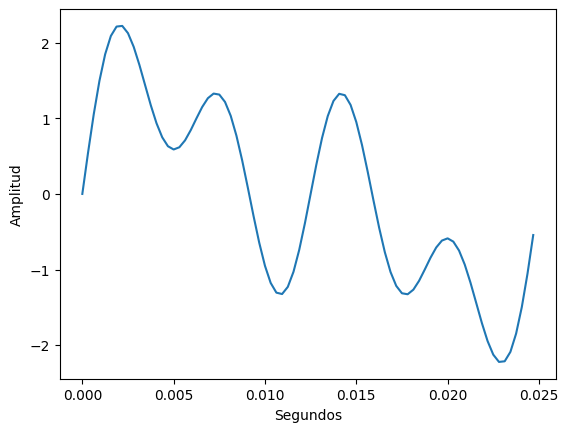

In [98]:
fs=3200 #Hz
time=np.arange(0,0.025,1/fs) #vector de tiempo, periodo 0.025?
frecuencias= [40, 80, 160]
senal=0
for frec in frecuencias:
    x=np.exp(1j*2*np.pi*frec*time) #cos + j sen
    senal+=x
plt.plot(time,np.imag(senal))
plt.ylabel('Amplitud')
plt.xlabel('Segundos')

**4.2** Calcule la transformada de Fourier de la señal y grafique el espectro de frecuencia. Identifique en el espectro las frecuencias que componen la señal. Trabaje con 10 periodos de la señal.

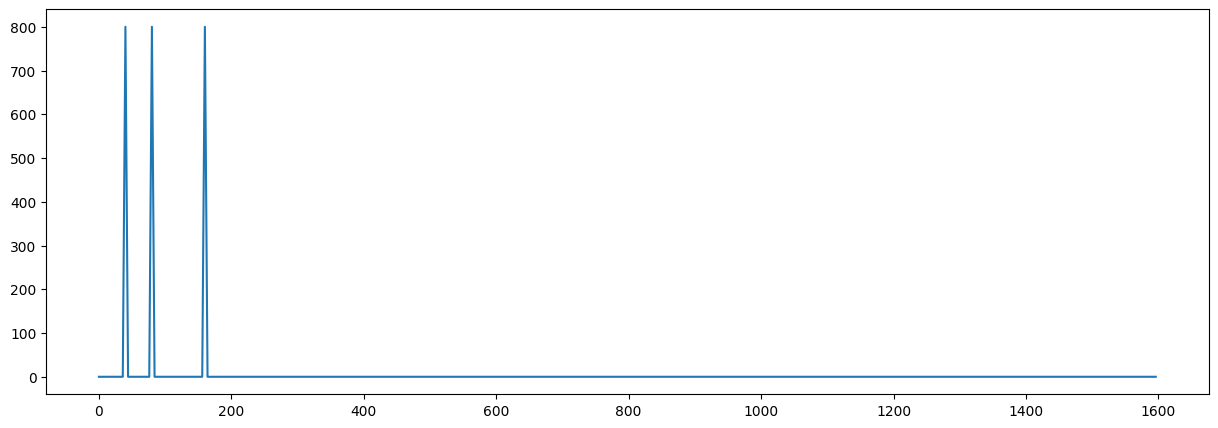

In [123]:
fs=3200 #Hz
time=np.arange(0,0.025*10,1/fs) #vector de tiempo, periodo 0.025?
frecuencias= [40, 80, 160]
senal=0
for frec in frecuencias:
    x=np.exp(1j*2*np.pi*frec*time) #cos + j sen
    senal+=x
Xsenal=np.fft.fft(senal)
nyquist=int(np.ceil(len(Xsenal)/2))
F=np.arange(0,nyquist)*fs/len(Xsenal)
plt.figure(figsize=(15,5))
plt.plot(F,np.real(Xsenal[0:nyquist]))

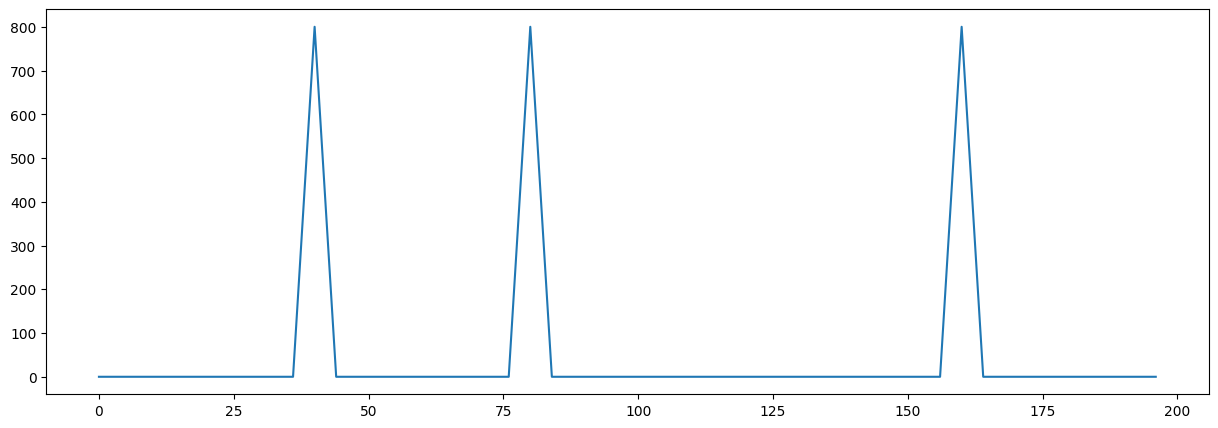

In [124]:
#zoom
plt.figure(figsize=(15,5))
plt.plot(F[0:50],np.real(Xsenal[0:nyquist])[0:50])

**4.3** Consulte la función que permite realizar el cálculo de la transformada inversa de Fourier. Aplíquelo a la señal anterior.

Existen varias librerias que incluyen funciones para el cálculo de la transformada inversa de fourier como Numpy.fft, Scipy.signal, entre otros. Dado que en el curso se está utlizando la libreria Numpy, la función correspondiente para la transformada inversa de fourier es numpy.fft.ifft

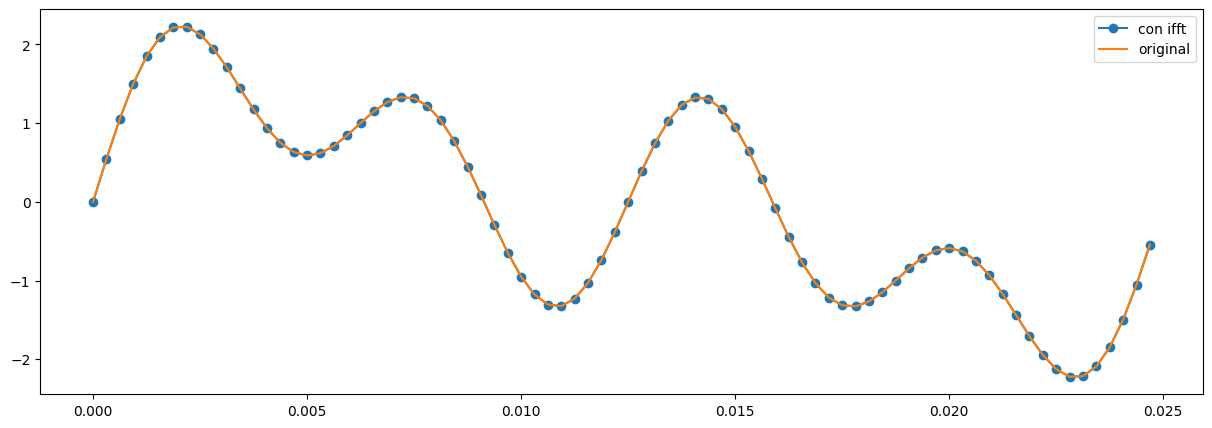

In [142]:
senal_ifft=np.fft.ifft(Xsenal)
plt.figure(figsize=(15,5))
plt.plot(time[0:80],np.imag(senal_ifft)[0:80],marker='o',label='con ifft') #1 periodo
plt.plot(time[0:80],np.imag(senal)[0:80],label='original')
plt.legend()

**4.4** ¿Podría decir que las siguientes líneas aplican un filtro? ¿Por qué?  ...

Si, porque una segmentación en frecuencias es equivalente a aplicar un pasa bandas ---> redactar mejor